# Image Classification with TensorFlow and Keras

## Description
This code demonstrates an image classification task using TensorFlow and Keras. It loads an image dataset, preprocesses it, builds a Convolutional Neural Network (CNN) model, trains the model, and visualizes the training and validation accuracy and loss. The code includes comments to explain each step in detail.

In [17]:
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
# Set the path to the dataset directory
data_dir = "Data"

# Define image dimensions and batch size for training
img_height = 150
img_width = 150
batch_size = 64

###  Load and split the dataset into training and validation sets

In [19]:
# Create a training dataset from the images in the data directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,    # Split the dataset into training and validation sets (20% validation)
  subset="training",       # Specify this dataset is for training
  seed=123,                # Set a random seed for reproducibility

  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 10 classes.
Using 16000 files for training.


In [20]:
# Create a validation dataset from the images in the data directory
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 10 classes.
Using 4000 files for validation.


### Retrieve class names from the training dataset

In [22]:
class_name = train_ds.class_names
class_name

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

### Create a 3x3 grid of sample images and their labels for visualization

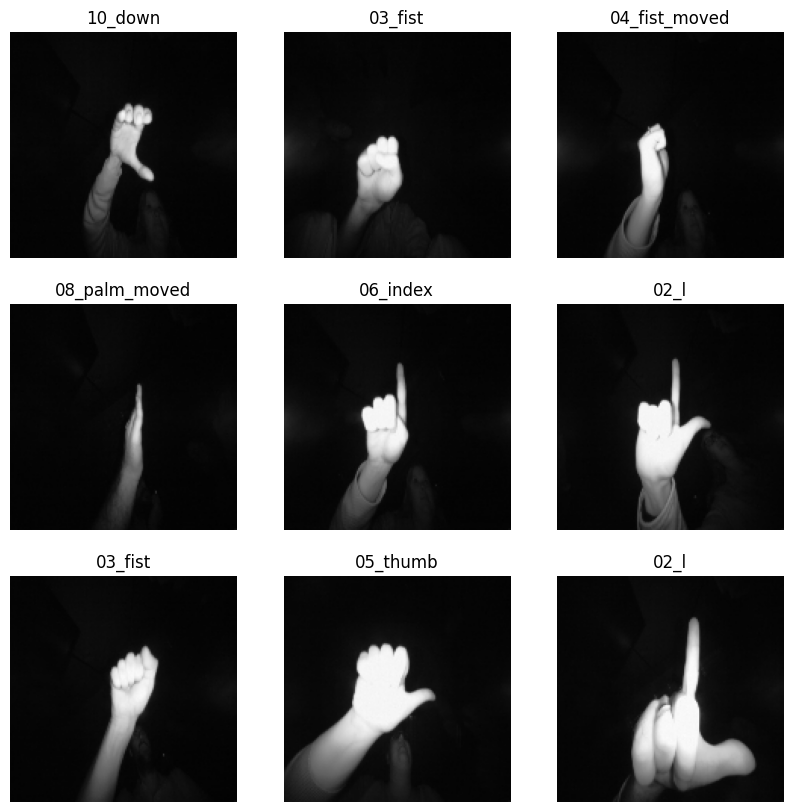

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):                               # Display 9 images
    ax = plt.subplot(3, 3, i + 1)                  # Create a subplot for each image
    plt.imshow(images[i].numpy().astype("uint8"))  # Display the image
    plt.title(class_name[labels[i]])               # Set the title to the class name
    plt.axis("off")                                # Turn off axis labels

In [24]:
# Set AUTOTUNE to a special value for optimizing data loading
AUTOTUNE = tf.data.AUTOTUNE

# Cache, shuffle, and prefetch the training dataset for better performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
# Get the number of classes from the class names
num_classes = len(class_name)

# Define a convolutional neural network (CNN) model using the Sequential API
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Rescale pixel values to [0, 1]
  layers.Conv2D(16, 3, padding='same', activation='relu'),  # Convolutional layer with 16 filters
  layers.MaxPooling2D(),  # Max pooling layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),  # Another convolutional layer with 32 filters
  layers.MaxPooling2D(),  # Another max pooling layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),  # Yet another convolutional layer with 64 filters
  layers.MaxPooling2D(),  # Yet another max pooling layer
  layers.Dropout(0.2),  # Dropout layer to prevent overfitting
  layers.Flatten(),  # Flatten the feature map
  layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
  layers.Dense(num_classes, name="output")  # Output layer with as many units as classes
])

### Compile the model with an optimizer, loss function, and metrics

In [26]:
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # Track accuracy as a metric

In [27]:
model.summary()  # Print a summary of the model's architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

## Train the model on the training dataset and validate it on the validation dataset

In [28]:
epochs=10  # Set the number of training epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 99s 360ms/step - loss: 0.2351 - accuracy: 0.9261 - val_loss: 0.0111 - val_accuracy: 0.9962
Epoch 2/10
250/250 [==============================] - 90s 358ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0019 - val_accuracy: 0.9995
Epoch 3/10
250/250 [==============================] - 89s 354ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0267 - val_accuracy: 0.9930
Epoch 4/10
250/250 [==============================] - 78s 312ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 80s 319ms/step - loss: 3.1146e-04 - accuracy: 0.9999 - val_loss: 4.7125e-04 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 81s 323ms/step - loss: 2.2991e-05 - accuracy: 1.0000 - val_loss: 7.7192e-04 - val_accuracy: 0.9995
Epoch 7/10
250/250 [==============================] - 82s 327ms/step - loss: 1.3103e-05 - accuracy: 1.0000 - val_l

In [29]:
# Save the trained model to a file
model.save("image_cls.h5")

## Extract training and validation accuracy and loss from the training history

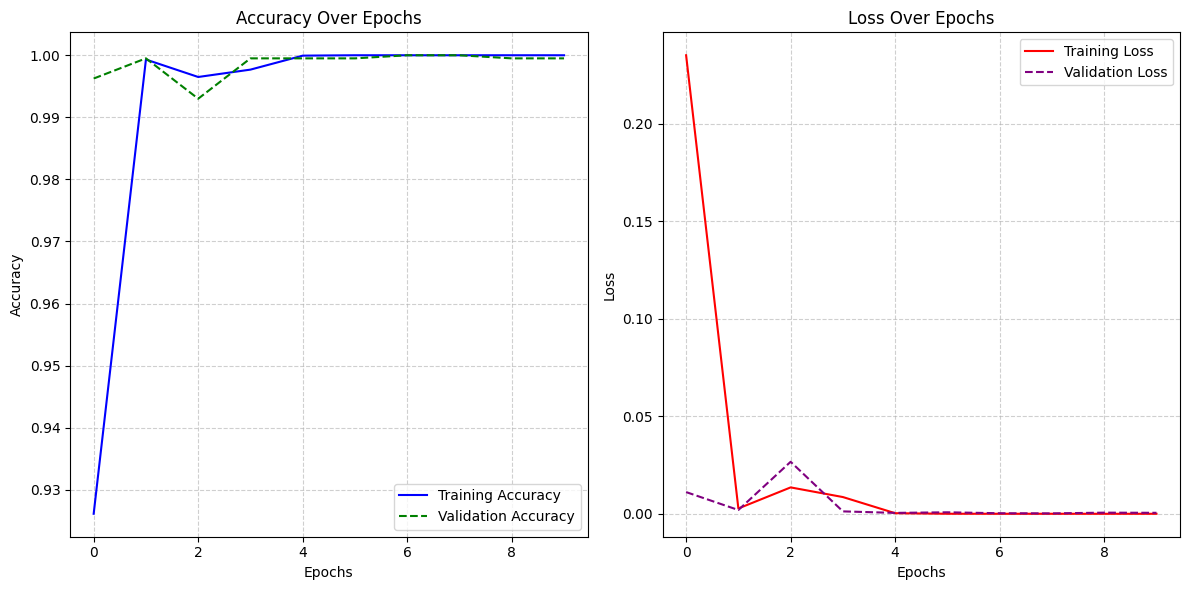

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
epochs_range = range(epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a 1x2 grid of subplots for accuracy and loss visualization
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue', linestyle='-')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='green', linestyle='--')
plt.legend(loc='lower right')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='red', linestyle='-')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='purple', linestyle='--')
plt.legend(loc='upper right')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust subplot spacing for better appearance
plt.show()